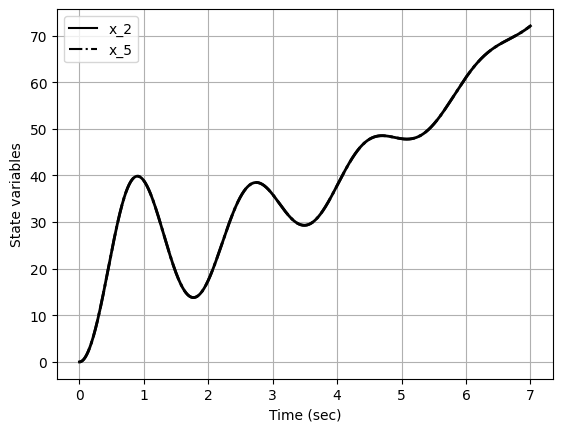

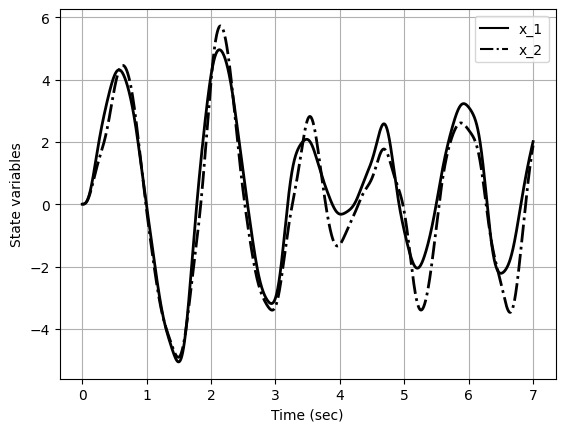

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import StateSpace, step, lsim

# تعریف مدل حالت-فضا
A = np.array([
    [0,    0,   0,   0,   0,    1,      0,      0,   0,   0],
    [0,    0,   0,   0,   0,    1,     -1,      0,   0,   0],
    [0,    0,   0,   0,   0,    0,      1,     -1,   0,   0],
    [0,    0,   0,   0,   0,    0,      0,      1,  -1,   0],
    [0,    0,   0,   0,   0,    0,      0,      0,   1,  -1],
    [0, -12.5,  0,   0,   0,  -0.75,   0.75,    0,   0,   0],
    [0,  62.5,-62.5, 0,   0,   3.75,  -7.5,   3.75,  0,   0],
    [0,    0, 62.5,-62.5, 0,    0,   3.75,  -7.5,  3.75,  0], 
    [0,    0,   0, 62.5,-62.5,  0,     0,   3.75,  -7.5, 3.75],
    [0,    0,   0,   0,  62.5,  0,     0,     0,   3.75,-3.75]
])
b1 = np.array([0,  0,  0,  0,  0, 0.005,   0,  0,  0,  0])     # نیروی ورودی به شکل ستونی
b2 = np.array([0,  0,  0,  0,  0, 250,  0,  0,  0,  -1250])   # ورودی ثابت
C = np.array([1,   0,   0,   0,   0,   0,   0,   0,   0,   0])
D = 0

u = 750  # ورودی ثابت
b = b1*u + b2
train_model = StateSpace(A, b.reshape(-1, 1), C, D)  # تعریف مدل حالت-فضا

# پارامترهای شبیه‌سازی
t = np.arange(0, 7.001, 0.001)

# forced response
x0 = np.zeros_like(A[0])  # شرایط اولیه

# شبیه‌سازی با استفاده از تابع step
t, y_step = step(train_model, T=t, X0=x0)

# رسم نتایج شبیه‌سازی
plt.figure()
plt.plot(t, y_step, 'k', label='x_2')
plt.plot(t, y_step, 'k-.', label='x_5')
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.gca().lines[0].set_linewidth(2)
plt.gca().lines[1].set_linewidth(2)
plt.show()

# تولید ورودی u
u = 0.1*(np.sin(5*t) + np.sin(9*t) + np.sin(13*t) + np.sin(17*t) + np.sin(21*t))

# شبیه‌سازی با استفاده از تابع lsim
t, y_lsim, x_lsim = lsim(train_model, U=u, T=t, X0=x0)

# رسم نتایج شبیه‌سازی
plt.figure()
plt.plot(t, x_lsim[:, 0], 'k', label='x_1')
plt.plot(t, x_lsim[:, 1], 'k-.', label='x_2')
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.gca().lines[0].set_linewidth(2)
plt.gca().lines[1].set_linewidth(2)
plt.show()
